## Using Pandas to plot prior years on current year axis

dataset source
https://data-nifc.opendata.arcgis.com/datasets/nifc::wfigs-wildland-fire-locations-full-history/about

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Read in data

In [392]:
# read in data
df = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv', low_memory=False)

In [393]:
df.shape

(193376, 93)

In [394]:
df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,DispatchCenterID,EstimatedCostToDate,FinalFireReportApprovedByTitle,FinalFireReportApprovedByUnit,FinalFireReportApprovedDate,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireCode,FireDepartmentID,FireDiscoveryDateTime,FireMgmtComplexity,FireOutDateTime,FireStrategyConfinePercent,FireStrategyFullSuppPercent,FireStrategyMonitorPercent,FireStrategyPointZonePercent,FSJobCode,FSOverrideCode,GACC,ICS209ReportDateTime,ICS209ReportForTimePeriodFrom,ICS209ReportForTimePeriodTo,ICS209ReportStatus,IncidentManagementOrganization,IncidentName,IncidentShortDescription,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,InitialResponseDateTime,IrwinID,IsFireCauseInvestigated,IsFireCodeRequested,IsFSAssisted,IsMultiJurisdictional,IsReimbursable,IsTrespass,IsUnifiedCommand,LocalIncidentIdentifier,PercentContained,PercentPerimeterToBeContained,POOCity,POOCounty,POODispatchCenterID,POOFips,POOJurisdictionalAgency,POOJurisdictionalUnit,POOJurisdictionalUnitParentUnit,POOLandownerCategory,POOLandownerKind,POOLegalDescPrincipalMeridian,POOLegalDescQtr,POOLegalDescQtrQtr,POOLegalDescRange,POOLegalDescSection,POOLegalDescTownship,POOPredictiveServiceAreaID,POOProtectingAgency,POOProtectingUnit,POOState,PredominantFuelGroup,PredominantFuelModel,PrimaryFuelModel,SecondaryFuelModel,TotalIncidentPersonnel,UniqueFireIdentifier,WFDSSDecisionStatus,CreatedBySystem,ModifiedBySystem,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID
0,-104.457511,45.785037,1,NaN,CERTIFIED,50.64,2020/08/06 23:13:07+00,2020/08/06 23:13:24+00,50.6,20.0,MTMCC,NaN,NaN,NaN,2020/08/12 20:45:59+00,NaN,NaN,NaN,NaN,Human,Equipment,Farming Equipment,NDU0,NaN,2020/08/06 18:58:00+00,NaN,2020/08/12 14:00:00+00,NaN,NaN,NaN,NaN,PN,1502,NRCC,NaN,NaN,NaN,NaN,NaN,Ramme,NaN,WF,FI,45.78496,-104.4958,NaN,NaN,{FE67856C-7401-44BD-B6F3-9A57EF990079},NaN,0,1.0,0.0,0.0,0.0,NaN,000224,NaN,NaN,NaN,Carter,MTMCC,30011,C&L,MTLG42,NaN,Private,Private,NaN,NaN,NaN,NaN,NaN,NaN,NR16,C&L,MTLG42,US-MT,Grass,GR4,NaN,NaN,NaN,2020-MTLG42-000224,No Decision,wildcad,INFORM_Inspector,0,NaN,NaN,2020/08/06 19:50:29+00,2020/08/12 20:46:01+00,IRWIN,{E5436898-ED0D-4CB1-90C0-D61915FE1F29}
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,CALACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,2020/02/28 20:45:40+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSCC,NaN,NaN,NaN,NaN,NaN,LAC-066100,NaN,WF,FI,33.80898,-118.1807,NaN,NaN,{6A311ABB-DF4F-4947-B8DD-3900BDA784F6},NaN,0,NaN,NaN,NaN,NaN,NaN,066100,NaN,NaN,NaN,Los Angeles,CALACC,06037,NaN,CACAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC08,C&L,CALAC,US-CA,NaN,NaN,NaN,NaN,NaN,2020-CALAC-066100,No Decision,lacocad,lacocad,0,NaN,NaN,2020/02/28 20:52:36+00,2020/02/28 20:52:36+00,IRWIN,{0E79B7FD-2882-43CF-8CFA-911BD1C8F77A}
2,-114.835414,48.073946,3,NaN,DEFAULT,NaN,2017/10/18 00:30:00+00,2017/10/18 00:35:00+00,50.0,50.0,MTKIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN,2017/10/17 20:20:24+00,NaN,2017/11/09 21:59:59+00,NaN,NaN,NaN,NaN,NaN,NaN,NRCC,NaN,NaN,NaN,NaN,NaN,South Lost Prairie,NaN,WF,FI,48.07167,-114.8303,1.0,NaN,{9599AE8E-66B8-4412-B849-7271271B0463},NaN,0,0.0,0.0,0.0,0.0,NaN,000878,NaN,NaN,NaN,Flathead,NaN,30029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR02,DNRC,MTNWS,US-MT,NaN,NaN,NaN,NaN,NaN,2017-MTNWS-000878,NaN,wildcad,wildcad,0,NaN,NaN,2017/10/18 13:46:40+00,2017/11/09 22:08:19+00,IRWIN,{FAC59A92-E6AD-443B-8625-4AAABCF7F533}
3,-117.153901,33.176394,4,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,CAMVIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MC2S,NaN,2019/07/01 19:54:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSCC,NaN,NaN,NaN,NaN,NaN,SYCAMORE,NaN,WF,FI,NaN,NaN,NaN,NaN,{1AF2C949-B159-4D8F-8D39-90CB58BC5DD5},NaN,0,1.0,0.0,1.0,0.0,NaN,009269,NaN,NaN,Na

In [395]:
# the vast majority of fires are wildfires
df.IncidentTypeCategory.value_counts()

WF    182553
RX     10707
CX       116
Name: IncidentTypeCategory, dtype: int64

### Clean/prepare data

In [396]:
# identify date columns
[x for x in df.columns if 'Date' in x]

['ContainmentDateTime',
 'ControlDateTime',
 'EstimatedCostToDate',
 'FinalFireReportApprovedDate',
 'FireDiscoveryDateTime',
 'FireOutDateTime',
 'ICS209ReportDateTime',
 'InitialResponseDateTime',
 'StrategicDecisionPublishDate',
 'CreatedOnDateTime_dt',
 'ModifiedOnDateTime_dt']

In [397]:
# none of these are in datetime format
df[[x for x in df.columns if 'Date' in x]].dtypes

ContainmentDateTime              object
ControlDateTime                  object
EstimatedCostToDate             float64
FinalFireReportApprovedDate      object
FireDiscoveryDateTime            object
FireOutDateTime                  object
ICS209ReportDateTime             object
InitialResponseDateTime          object
StrategicDecisionPublishDate     object
CreatedOnDateTime_dt             object
ModifiedOnDateTime_dt            object
dtype: object

In [398]:
# since I want to do some analysis about the number of firefires in each year
# I will format FireDiscoveryDateTime column to datetime format
df['FireDiscoveryDateTime'] = pd.to_datetime(df['FireDiscoveryDateTime'])

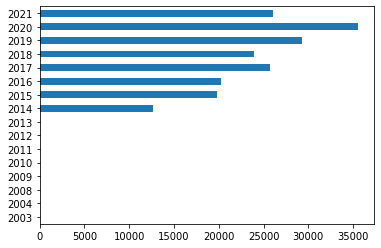

In [399]:
# what is the distribution of fires by year?
df.FireDiscoveryDateTime.dt.year.value_counts().sort_index().plot(kind='barh');

In [400]:
# exclude fires extinguished prior to 2014 since there is very little data for these years
df = df[df.FireDiscoveryDateTime.dt.year > 2013]

In [401]:
df.groupby([df.FireDiscoveryDateTime.dt.month, df.FireDiscoveryDateTime.dt.year]).size() \
    .groupby(level=1).apply(lambda x: 100 * x / float(x.sum())).unstack()

FireDiscoveryDateTime,2014,2015,2016,2017,2018,2019,2020,2021
FireDiscoveryDateTime,,,,,,,,
1,0.007890,1.641746,1.496222,1.818111,3.722561,1.727204,2.601635,4.853476
2,0.047337,2.510608,5.209619,3.414311,2.762708,2.411246,3.705785,4.010726
3,0.071006,5.450596,7.105822,5.220743,6.188966,5.732266,5.383081,13.123923
4,0.497041,8.516872,8.661301,6.135638,9.894833,9.357685,7.198045,16.885654
5,5.222880,6.789250,8.063799,7.583898,10.366413,8.848074,10.178968,15.284428
6,13.072978,14.942413,14.038813,12.676166,11.397212,10.506875,12.541792,18.004214
7,38.682446,22.221661,20.433559,24.733318,24.505467,16.858198,17.657966,27.105918
8,25.806706,19.817135,14.799269,16.059332,14.393623,16.249401,17.098868,0.731661
9,7.668639,7.738937,8.034171,8.864751,7.895835,12.456392,8.852864,NaN


<Figure size 432x288 with 0 Axes>

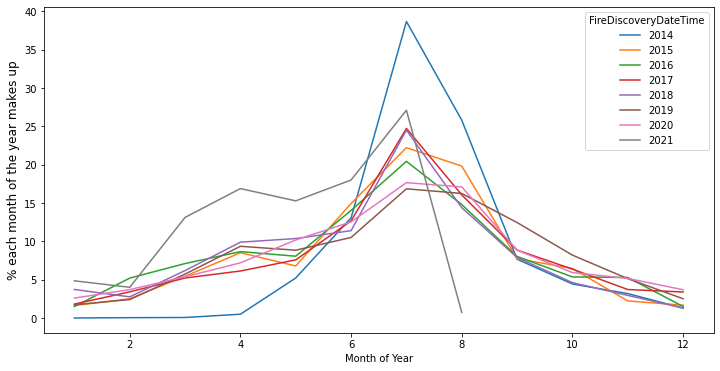

In [402]:
# examine distribution by month of year

plt.figure()

df.groupby([df.FireDiscoveryDateTime.dt.month, df.FireDiscoveryDateTime.dt.year]).size() \
    .groupby(level=1).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(figsize=(12, 6))

plt.ylabel('% each month of the year makes up', fontsize=12)
plt.xlabel('Month of Year');

<Figure size 432x288 with 0 Axes>

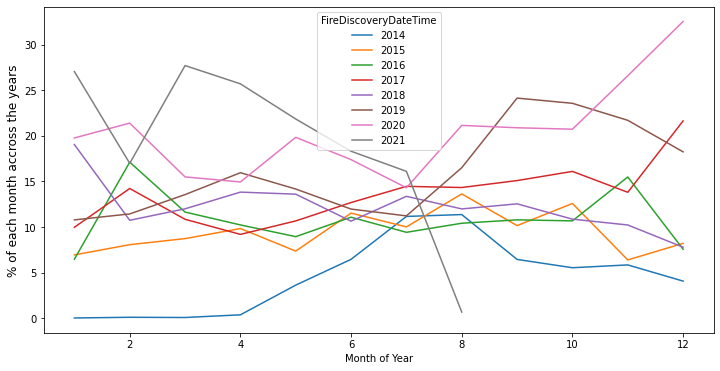

In [403]:
# take a look at the distribution by each month accross all years 

plt.figure()

df.groupby([df.FireDiscoveryDateTime.dt.month, df.FireDiscoveryDateTime.dt.year]).size() \
    .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(figsize=(12, 6))

plt.ylabel('% of each month accross the years', fontsize=12)
plt.xlabel('Month of Year');

In [404]:
# since 2014 data doesn't look complete for the first half of the year I will exclude this year as well
df = df[df.FireDiscoveryDateTime.dt.year > 2014]

# Plot cumulative sum amounts of fires each year

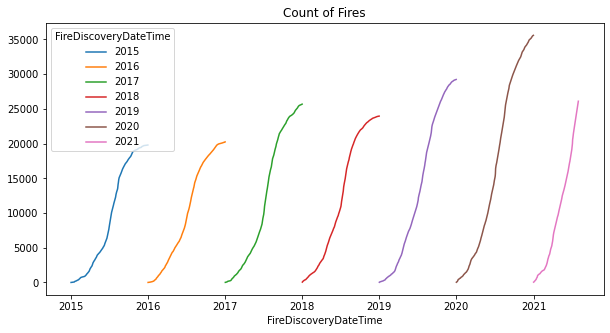

In [405]:
df.groupby([df.FireDiscoveryDateTime.dt.date, df.FireDiscoveryDateTime.dt.year])['CalculatedAcres'].size().round(0).unstack().cumsum() \
    .plot(figsize=(10, 5), title='Count of Fires');

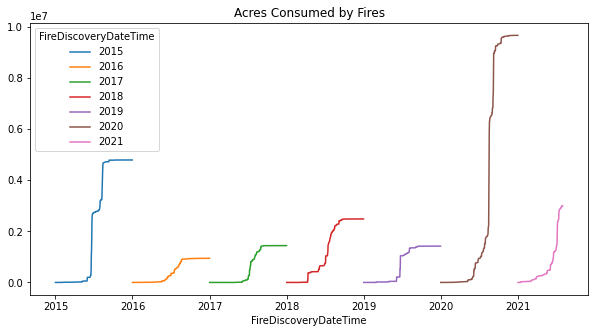

In [406]:
df.groupby([df.FireDiscoveryDateTime.dt.date, df.FireDiscoveryDateTime.dt.year])['CalculatedAcres'].sum().round(0).unstack().cumsum() \
    .plot(figsize=(10, 5), title='Acres Consumed by Fires');

Neither of these views give us a a good picture of how the current year compares with the prior years.  Instead, below I will show how to plot all of these years on top of each other to better compare the number of fires so far in 2021, and the acres consumed by wildfires in 2021.

## Plot prior years against current year - count of fires

#### 1. set current year date range

In [407]:
current_year = datetime.datetime.today().year

In [408]:
# find current year date range
current_year_date_range = pd.date_range(pd.to_datetime(f'{current_year}'), pd.to_datetime(f'{current_year}-12-31'))

In [409]:
current_year_date_range

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

#### 2. aggregate data

In [410]:
df_agg = df.groupby([df.FireDiscoveryDateTime.dt.dayofyear, df.FireDiscoveryDateTime.dt.year])['CalculatedAcres'].size().round(0) \
    .rename_axis(['Date','Year']).unstack().fillna(0)

#### 3. map prior years onto current year

In [411]:
 # if non leap year adjust days to match current year by consolidating count from day 366 to day 365
if len(current_year_date_range) != len(df_agg.index):

    df_agg.loc[len(current_year_date_range)] = df_agg.loc[df_agg.index.max()]

    # drop day 366
    df_agg.drop(df_agg[len(current_year_date_range) < df_agg.index].index, inplace=True)

In [412]:
# examining the end of the year, the data looks as expected
df_agg.tail()

Year,2015,2016,2017,2018,2019,2020,2021
Date,,,,,,,
361,1.0,4.0,12.0,4.0,6.0,44.0,0.0
362,4.0,3.0,17.0,6.0,5.0,44.0,0.0
363,0.0,5.0,16.0,6.0,8.0,32.0,0.0
364,2.0,25.0,18.0,5.0,14.0,21.0,0.0
365,0.0,11.0,0.0,0.0,0.0,15.0,0.0


#### 3.1 Method 1 - compute cumulative sum amounts 


In [413]:
# compute cumulative sum amounts 
df_agg = pd.concat([
    df_agg[df_agg.columns[df_agg.columns != datetime.datetime.today().year]].cumsum(),
    df_agg.loc[pd.to_datetime(datetime.datetime.today().date()).dayofyear > df_agg.index , df_agg.columns[df_agg.columns == datetime.datetime.today().year]].cumsum()
], axis=1)

In [414]:
df_agg.index = current_year_date_range

In [415]:
df_agg.tail().style.highlight_null(null_color='yellow')

Year,2015,2016,2017,2018,2019,2020,2021
2021-12-27 00:00:00,19788.000000,20170.000000,25619.000000,23938.000000,29196.000000,35464.000000,nan
2021-12-28 00:00:00,19792.000000,20173.000000,25636.000000,23944.000000,29201.000000,35508.000000,nan
2021-12-29 00:00:00,19792.000000,20178.000000,25652.000000,23950.000000,29209.000000,35540.000000,nan
2021-12-30 00:00:00,19794.000000,20203.000000,25670.000000,23955.000000,29223.000000,35561.000000,nan
2021-12-31 00:00:00,19794.000000,20214.000000,25670.000000,23955.000000,29223.000000,35576.000000,nan


#### 3.2 Method 2 - compute cumulative sum amounts 


In [378]:
# assign index to be the date range of the current year
df_agg.sort_index(inplace=True)

df_agg = df_agg.cumsum()

df_agg.index = current_year_date_range

In [379]:
# verify that index is sorted coresponding to the adj_day_sequence we created above
df_agg.sort_index()

Year,2015,2016,2017,2018,2019,2020,2021
2021-01-01,1.0,4.0,11.0,52.0,26.0,31.0,41.0
2021-01-02,2.0,9.0,30.0,148.0,80.0,94.0,98.0
2021-01-03,5.0,16.0,56.0,278.0,148.0,176.0,180.0
2021-01-04,13.0,30.0,92.0,439.0,228.0,275.0,309.0
2021-01-05,29.0,47.0,140.0,632.0,316.0,399.0,475.0
...,...,...,...,...,...,...,...
2021-12-27,3429312.0,3589493.0,4316764.0,4391954.0,4853948.0,6045568.0,NaN
2021-12-28,3449104.0,3609666.0,4342400.0,4415898.0,4883149.0,6081073.0,NaN
2021-12-29,3468896.0,3629844.0,4368052.0,4439848.0,4912358.0,6116610.0,NaN
2021-12-30,3488690.0,3650047.0,4393722.0,4463803.0,4941581.0,6152168.0,NaN


In [380]:
# for the current year 
# for days beyond the latest date remove cumsum() values

df_agg.loc[df_agg.loc[str(str(datetime.datetime.today().date())) < df_agg.index].index, current_year] = None

In [381]:
df_agg.tail().style.highlight_null(null_color='yellow')

Year,2015,2016,2017,2018,2019,2020,2021
2021-12-27 00:00:00,3429312.000000,3589493.000000,4316764.000000,4391954.000000,4853948.000000,6045568.000000,nan
2021-12-28 00:00:00,3449104.000000,3609666.000000,4342400.000000,4415898.000000,4883149.000000,6081073.000000,nan
2021-12-29 00:00:00,3468896.000000,3629844.000000,4368052.000000,4439848.000000,4912358.000000,6116610.000000,nan
2021-12-30 00:00:00,3488690.000000,3650047.000000,4393722.000000,4463803.000000,4941581.000000,6152168.000000,nan
2021-12-31 00:00:00,3508484.000000,3670261.000000,4419392.000000,4487758.000000,4970804.000000,6187741.000000,nan


#### 4. plot

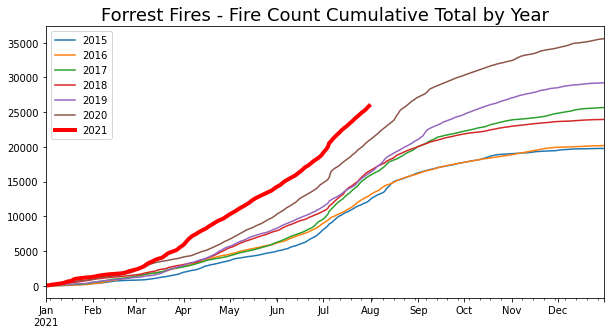

In [416]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot prior years
df_agg.loc[:,df_agg.columns < current_year].plot(title='Forrest Fires', ax=ax)

# highlight current year by 
# plotting in red with extra thickness
df_agg.loc[:,df_agg.columns == current_year].plot(linewidth=4, color='red', ax=ax)

plt.legend(list(df_agg.columns[df_agg.columns <= current_year]))

plt.title('Forrest Fires - Fire Count Cumulative Total by Year', fontsize=18);

## Plot prior years against current year - count of acres consumed

Compressing what I did above for count of fires per year, how do the years compare based on acres consumed by fires?

In [417]:
current_year = datetime.datetime.today().year

# find current year date range
current_year_date_range = pd.date_range(pd.to_datetime(f'{current_year}'), pd.to_datetime(f'{current_year}-12-31'))

df_agg = df.groupby([df.FireDiscoveryDateTime.dt.dayofyear, df.FireDiscoveryDateTime.dt.year])['CalculatedAcres'].sum().round(0) \
.rename_axis(['Date','Year']).unstack().fillna(0)

 # if non leap year adjust days to match current year by consolidating count from day 366 to day 365
if len(current_year_date_range) != len(df_agg.index):

    df_agg.loc[len(current_year_date_range)] = df_agg.loc[df_agg.index.max()]

    # drop day 366
    df_agg.drop(df_agg[len(current_year_date_range) < df_agg.index].index, inplace=True)
    
# compute cumulative sum amounts 
df_agg = pd.concat([
    df_agg[df_agg.columns[df_agg.columns != datetime.datetime.today().year]].cumsum(),
    df_agg.loc[pd.to_datetime(datetime.datetime.today().date()).dayofyear > df_agg.index , df_agg.columns[df_agg.columns == datetime.datetime.today().year]].cumsum()
], axis=1)

df_agg.index = current_year_date_range

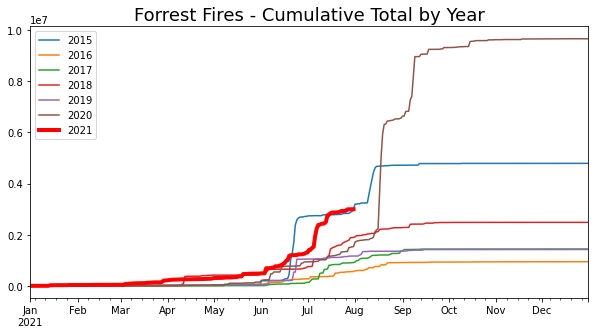

In [418]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot prior years
df_agg.loc[:,df_agg.columns < current_year].plot(title='Forrest Fires', ax=ax)

# highlight current year by 
# plotting in red with extra thickness
df_agg.loc[:,df_agg.columns == current_year].plot(linewidth=4, color='red', ax=ax)

plt.legend(list(df_agg.columns[df_agg.columns <= current_year]))

plt.title('Forrest Fires - Cumulative Total by Year', fontsize=18);

### Summary

Looking at the count of fires - 2021 is greater than any of the previous 6 years that we have data for.

Looking at the acres consumed by fires - 2021 is tracking closly to acres consumed in 2015.